In [3]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [4]:
access_token="2945289565-wRN9KXAVXe1B79dHB8Hlr2gtObWSi0shPh2bQ3L"
access_token_secret="n4qoueWhjt8bpcstB9GnzyL4kB3mA31xi3FhFtWfx4ug9"
consumer_key="29LdhaAyfobKT0J2T3rFUEvFk"
consumer_secret="h82EHiAGzVlZJ7goHnJWuG6LG2m6GeormqacrADqDtuefCp5xs"

In [9]:
#Basic Listener to print incoming tweets
class StdOutListener(StreamListener):#this class is extending StreamListener class
    def on_data(self,data): #this method passes data to from statues to on_status method 
        print(data)
        return True
    def on_error(self,status): #passes error codes to an on_error 
        print(status)
        

In [43]:
#Handles Twitter Auth and Connection to Twitter A/C
print(StreamListener)
l = StdOutListener()
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
#stream = Stream(auth,l)
api = tweepy.API(auth)

<class 'tweepy.streaming.StreamListener'>


In [44]:
tweets = api.user_timeline(screen_name = 'realDonaldTrump' , count = 20,tweet_mode="extended") #'extended' is for long tweets
#print(tweets)

In [45]:
datet = []

for tweet in tweets:
    #print(tweet.created_at)
    datet.append(tweet.created_at) #created_at is root level attribute of twitter object. Telling the date and time when the tweet was created
#print(datet)

In [46]:
tmp = []

tweets_for_csv = [tweet.full_text for tweet in tweets] #full_text giving the enitre tweet
for j in tweets_for_csv:
    tmp.append(j)
#If a Tweet contains longer text, it will contain an additional object in the JSON response called extended_tweet, which will in turn contain a field called full_text.    

In [47]:
len(tmp)

20

In [49]:
from country_list import countries

In [50]:
def fetch_tweets(id,count = 20):
    tmp = []
    for tweet in tweepy.Cursor(api.user_timeline, id, tweet_mode = "extended").items(count):
        tmp.append(tweet.full_text)
    return tmp
#Cursor is use for pagination/paging ,used for iterating though items like timelines,users list, direct messages

In [52]:
def read_sent_CSV(filename,delimiter = " "):
    df = pd.read_csv(filename)
    full_data = df.values.tolist()
    return full_data
# values.tolist() is a function of pandas, it takes the value from several columns of the dataframe and converts them into a list.

In [53]:
#sentiment analysis
def review_sent(tweets,neg_sents,pos_sents): #creating a function,passing csv files for negative and positive words
    ref_countries = {}  
    sent_review = {}
    for country in countries: 
        sent_c  = 0
        for tweet in tweets:  
            if country['name'] in tweet:
                for sent in neg_sents:
                    if sent[0] in tweet: #[0] is used as without it sent was like ['2-Faced'...],with it is like 2-faced
                        sent_c -=1
                for sent in pos_sents:
                    if sent[0] in tweet:
                        sent_c +=1
                if country['name'] not in sent_review:
                    sent_review[country['name']] = 0
                if country['name'] not in ref_countries:
                    ref_countries[country['name']] = 0
                ref_countries[country['name']]+= 1
                sent_review[country['name']] = sent_c
    return ref_countries,sent_review

In [54]:
neg_sents = read_sent_CSV('negative_sent.csv')
pos_sents = read_sent_CSV('positive_sent.csv')

In [56]:
delegates = ['narendramodi' , 'realDonaldTrump', 'POTUS44']
sent_analysis = {}
for delegate in delegates:
    tweets = fetch_tweets(delegate,200)
    ref_countries, sent_review = review_sent(tweets,neg_sents,pos_sents) 
    sent_analysis[delegate] = sent_review 

In [57]:
delegate_countries = {'narendramodi':'India' ,'realDonaldTrump': 'United States' , 'POTUS44':'United States'}

print(sent_analysis) 

{'narendramodi': {'India': 77, 'United Kingdom': 3}, 'realDonaldTrump': {'Germany': -2, 'France': -7, 'Iran': -11, 'Jordan': -3, 'North Korea': -8, 'South Korea': -1, 'Poland': -1, 'Russia': -4, 'Sweden': 1, 'Singapore': -4, 'Syria': -3, 'United States': -10}, 'POTUS44': {'Canada': 2, 'Colombia': -1, 'Cuba': -2, 'India': 0, 'Liberia': 3, 'Mali': 0, 'Mexico': 1, 'Syria': -3, 'Laos': -2}}


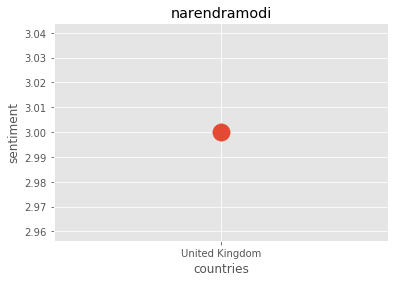

<Figure size 2160x720 with 0 Axes>

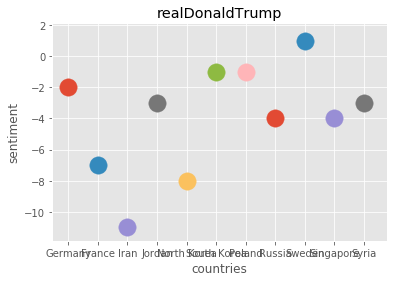

<Figure size 2160x720 with 0 Axes>

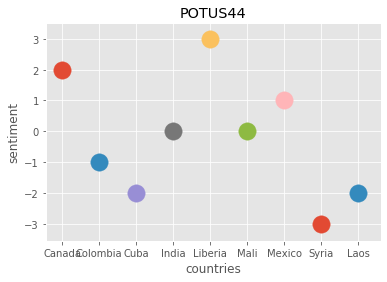

<Figure size 2160x720 with 0 Axes>

In [62]:
for delegate in delegates:
    plt.title(delegate)
    plt.xlabel('countries')
    plt.ylabel('sentiment')
    for country in sent_analysis[delegate]:
        if country != delegate_countries[delegate]:
            plt.scatter(country,sent_analysis[delegate][country],s=300)
    fig = plt.gcf() 
    plt.show()